In [155]:
import sys
sys.path.insert(0, "/Users/aimachine/PyImage/utils")
import numpy as np
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from plot_utils import multiplotlineX, overlaymultiplotX,overlaymultiplotXSave
from bokeh.plotting import figure, output_file, show
from bokeh.io import export_png, output_notebook

# Specify the Directory where the CTrack generated text files are and where the plots must be saved in

In [156]:
sourcedir = '/Users/aimachine/Documents/JuliaData/ResultsTxtFiles/Visit_1/C1/'
saveplotdir= '/Users/aimachine/Documents/JuliaData/ResultsTxtFiles/Visit_1/C1/Plots/'

Save all Plots, Bokeh and Non-Bokeh as png files in the save directory

In [157]:
FileLabel=[]
Time = []
TotalNucInt = []
AvNucInt = []
AreaNuc = []
TotalCloInt = []
AvCloInt = []
AreaClo = []

Path = os.path.join(sourcedir, '*.txt')
X = sorted(glob.glob(Path))
Names = sorted(glob.glob(Path))
for file in Names:
  


 base = os.path.split(file)[-1]

 Filename = os.path.splitext(base)
 print('Saving Plot for :', Filename[0])
 time , TotalIntCell, AvIntCell, AreaCell, TotalIntCloud, AvIntCloud, AreaCloud = np.loadtxt(file, delimiter = ',', skiprows = 1, unpack=True)
 
 FileLabel.append(Filename[0])   
 Time.append(time)
 TotalNucInt.append(TotalIntCell)
 AvNucInt.append(AvIntCell)
 AreaNuc.append(AreaCell)
 TotalCloInt.append(TotalIntCloud)
 AvCloInt.append(AvIntCloud)
 AreaClo.append(AreaCloud)   
 
 #Bokeh plots
 p = figure(title='Nuclei and Cloud Intensity', x_axis_label='Time', y_axis_label='Amplitude')
 p.line(time, TotalIntCell, legend = "Nuclei Intensity-time", line_width = 2)
 p.line(time, TotalIntCloud, legend = "Cloud Intensity-time", line_width = 2, line_color='red')
 output_notebook()
 
 export_png(p, filename=saveplotdir + 'TotalIntensity' + Filename[0] + '.png')
  

Saving Plot for : CTrackSUM_C1-20180629-TX1072-CL60-Dox0820_visit_1.tifTrackID0Channel 1


Loading BokehJS ...

Saving Plot for : CTrackSUM_C1-20180629-TX1072-CL60-Dox0820_visit_1.tifTrackID1Channel 1


Loading BokehJS ...

Saving Plot for : CTrackSUM_C1-20180629-TX1072-CL60-Dox0820_visit_1.tifTrackID2Channel 1


Loading BokehJS ...

# Display Intensity and Area of Nuclei and Cloud using Interactive plots

In [158]:

p = figure(title='Nuclei and Cloud Intensity', x_axis_label='Time', y_axis_label='Amplitude')


 
for i in range(len(Time)):     
 
 #Bokeh plots
 
 p.line(Time[i], TotalNucInt[i], legend = "Nuclei Intensity-time", line_width = 2)
 p.line(Time[i], TotalCloInt[i], legend = "Cloud Intensity-time", line_width = 2, line_color='red')

output_notebook()
show(p)
export_png(p, filename=saveplotdir + 'TotalIntensity' + 'MultiBokeh' + '.png') 


Loading BokehJS ...

'/Users/aimachine/Documents/JuliaData/ResultsTxtFiles/Visit_1/C1/Plots/TotalIntensityMultiBokeh.png'

# Here we plot the area of the Nuclei versus that of the cloud

In [159]:
p = figure(title='Nuclei and Cloud Area', x_axis_label='Time', y_axis_label='Amplitude')
for i in range(len(Time)):

       
 
 #Bokeh plots
 
 p.line(Time[i], AreaNuc[i], legend = "Nuclei Area-time", line_width = 2)
 p.line(Time[i], AreaClo[i], legend = "Cloud Area-time", line_width = 2, line_color='red')
output_notebook()
show(p)
export_png(p, filename=saveplotdir + 'Area' + 'MultiBokeh' + '.png') 

Loading BokehJS ...

'/Users/aimachine/Documents/JuliaData/ResultsTxtFiles/Visit_1/C1/Plots/AreaMultiBokeh.png'

# Do the same using non-interactive, conventional python plots

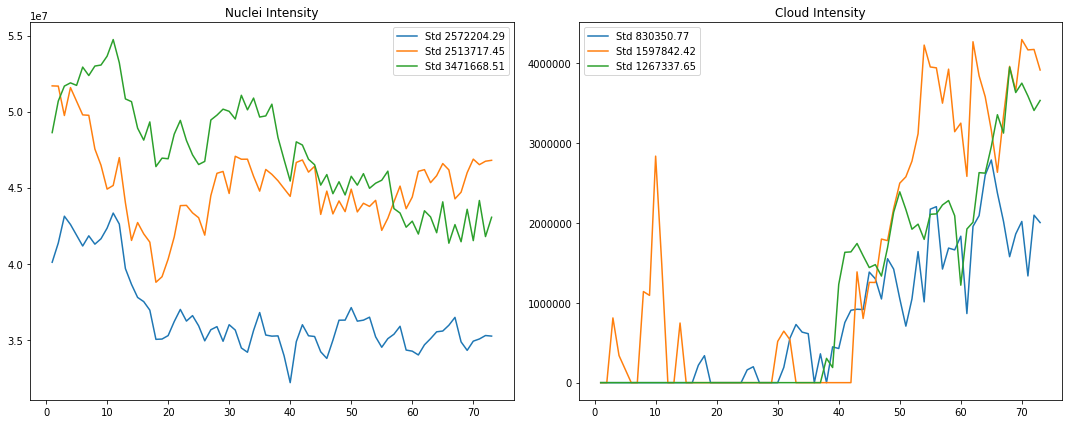

In [160]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
f = open(saveplotdir + 'Standard Deviation Nuclei' + '.txt', 'w')
f.write('Filename'  + " " + 'Standard deviation Nuclei Intensity'+ "\n") 
f.write('\n')
for i in range(len(Time)):

 f.write(Filename[0] + " " + str(np.std(TotalIntCell)) + '\n')
 



 ax = axes.ravel()
 ax[0].plot(Time[i],TotalNucInt[i], label = 'Std' + " " + '{:.2f}'.format(np.std(TotalNucInt[i])))
 ax[0].set_title('Nuclei Intensity')
 ax[0].legend()   
 ax[1].plot(Time[i],TotalCloInt[i], label = 'Std' + " " + '{:.2f}'.format(np.std(TotalCloInt[i])))
 ax[1].set_title('Cloud Intensity')
 ax[1].legend()   
    
    
plt.tight_layout()
    
Title = 'MultiPlotIntensity'   
  
plt.savefig(saveplotdir + Title + '.png')
plt.show()
f.close()       


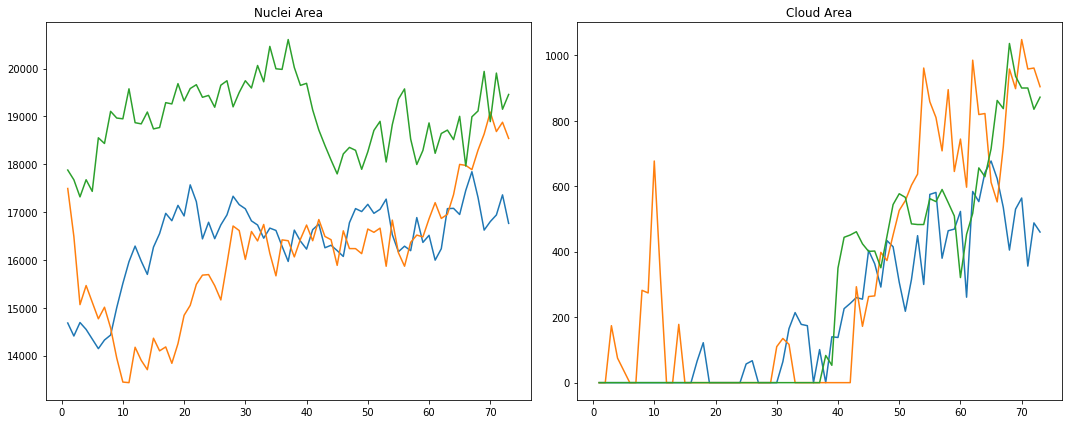

In [161]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for i in range(len(Time)):


 



 ax = axes.ravel()
 ax[0].plot(Time[i],AreaNuc[i])
 ax[0].set_title('Nuclei Area')
 
 ax[1].plot(Time[i],AreaClo[i])
 ax[1].set_title('Cloud Area')
  
    
    
plt.tight_layout()
    
Title = 'MultiPlotArea'   
  
plt.savefig(saveplotdir + Title + '.png')
plt.show()
 
